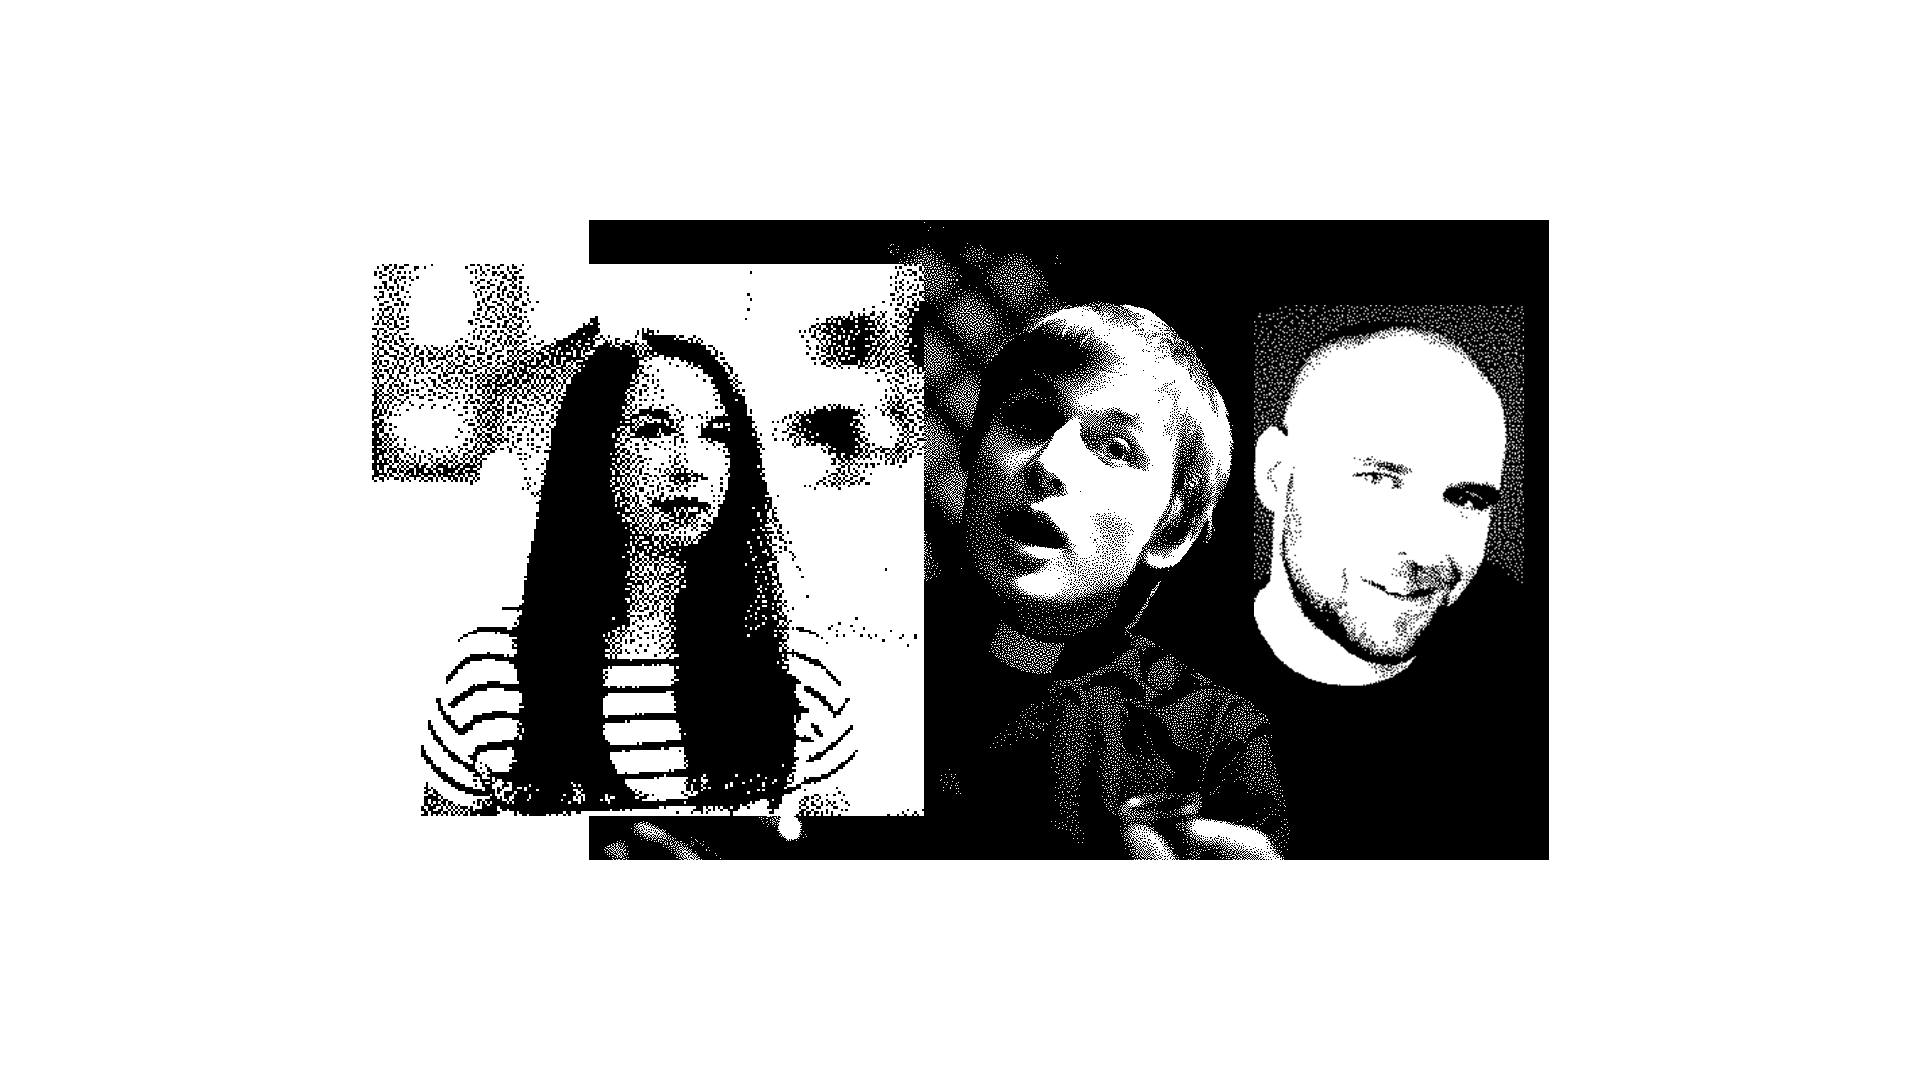

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




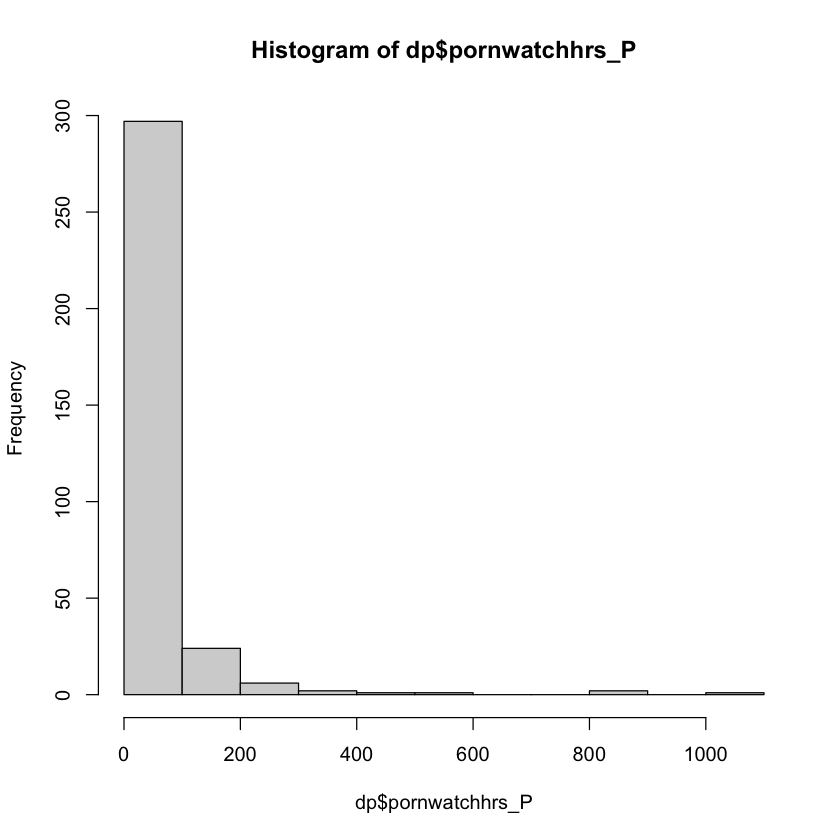

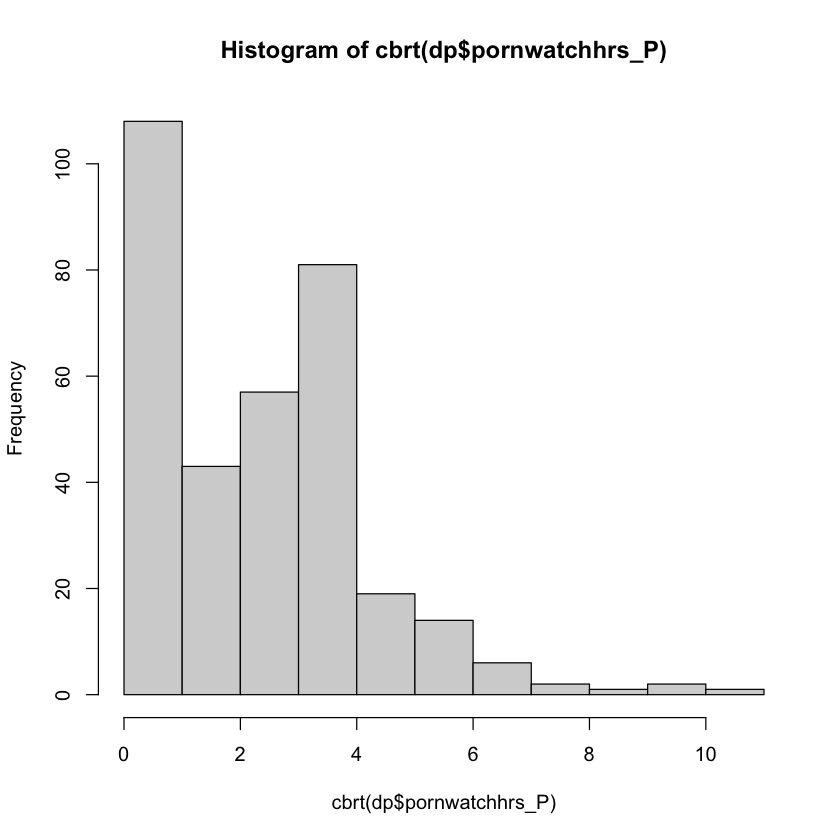

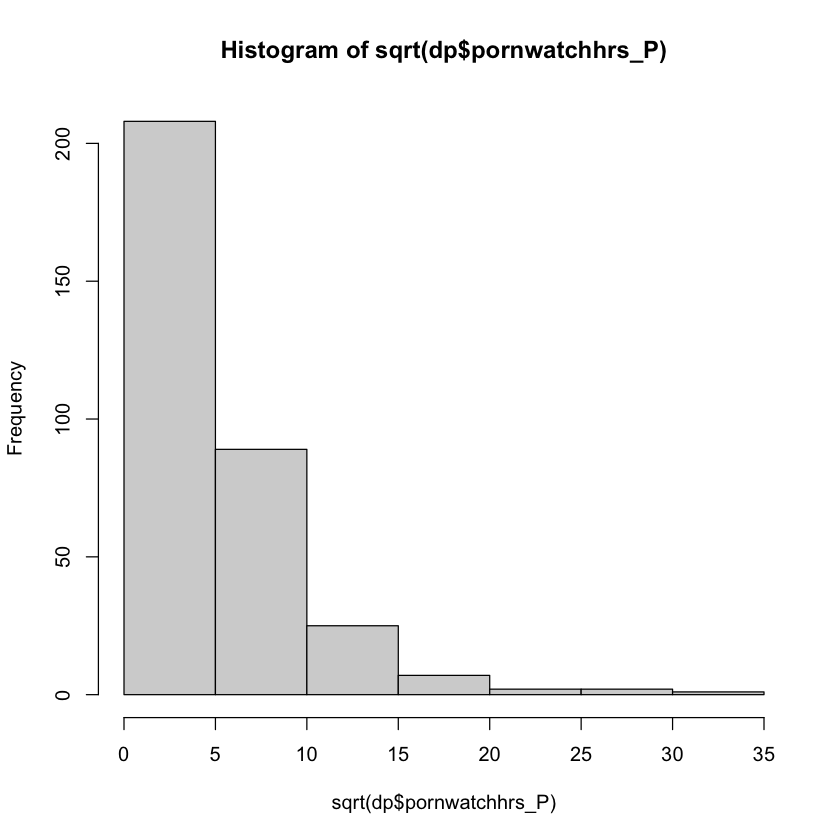

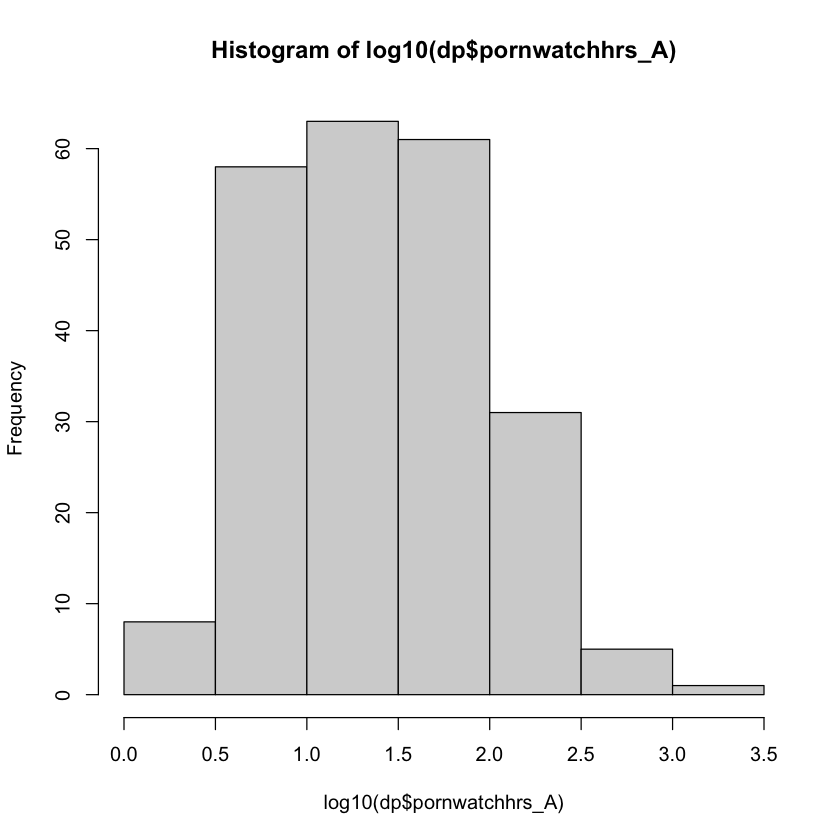

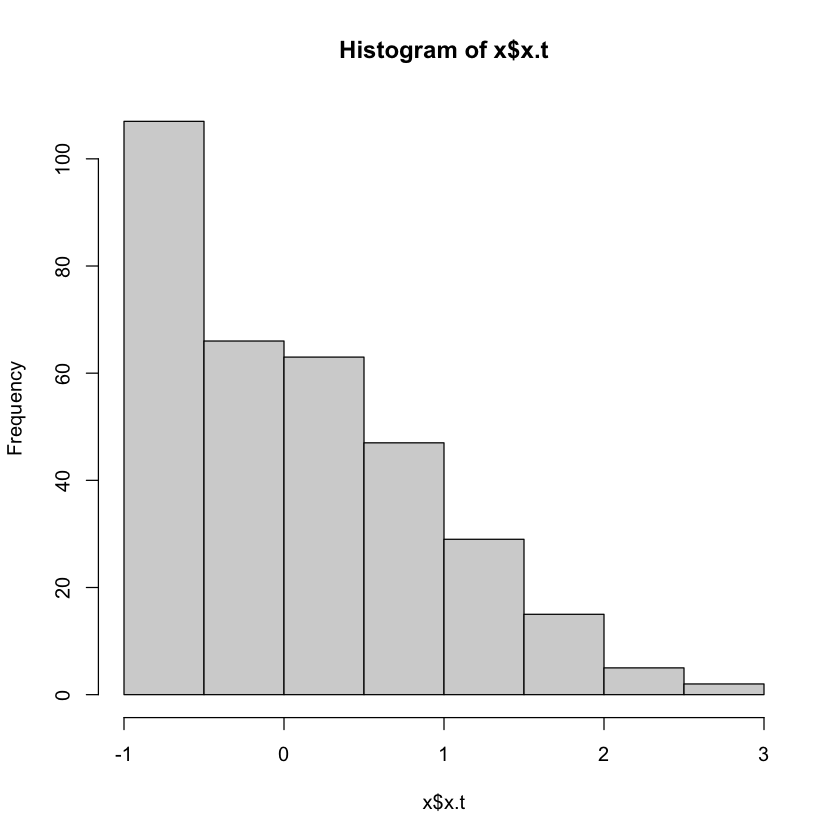

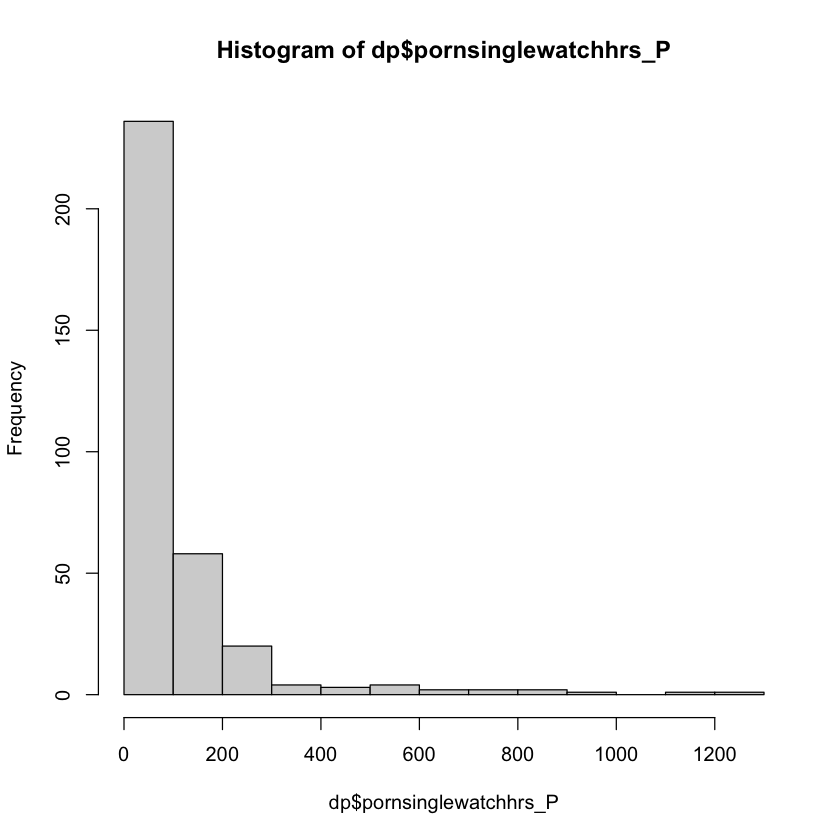

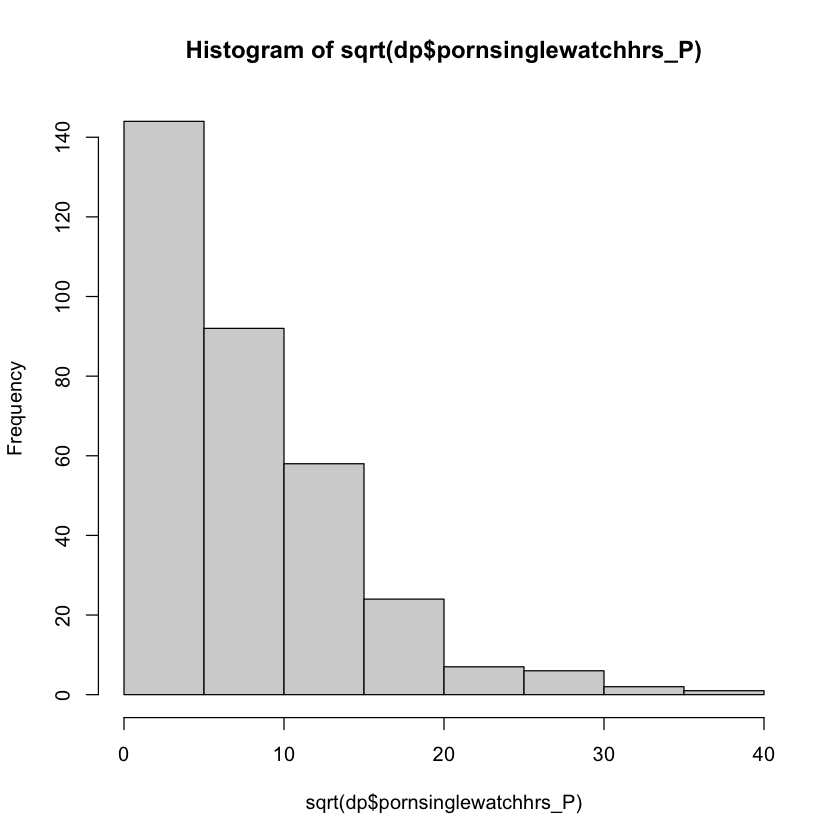

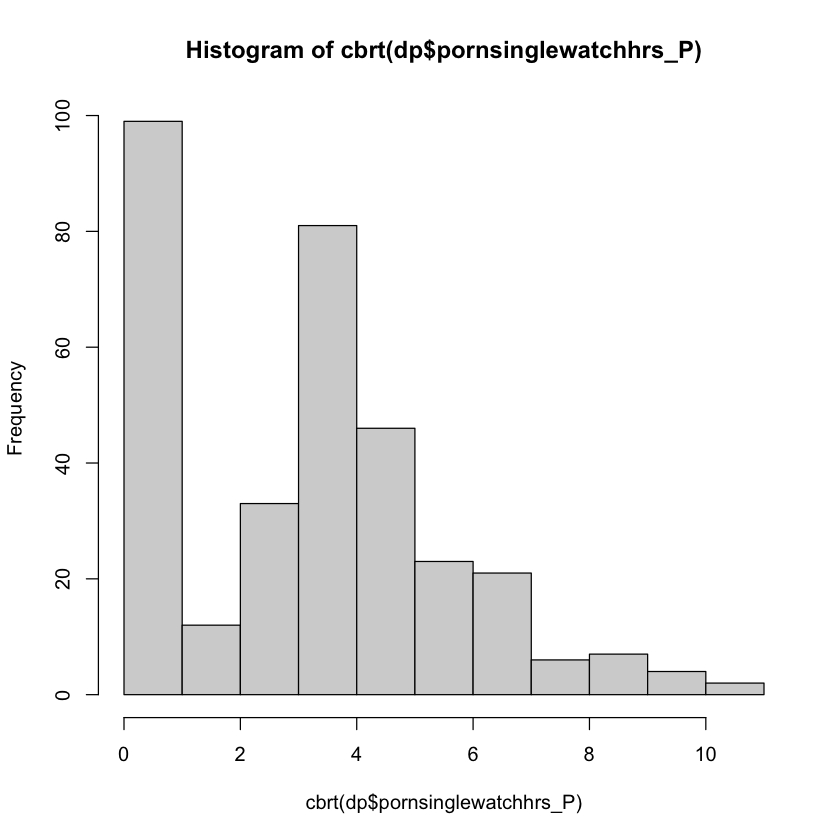

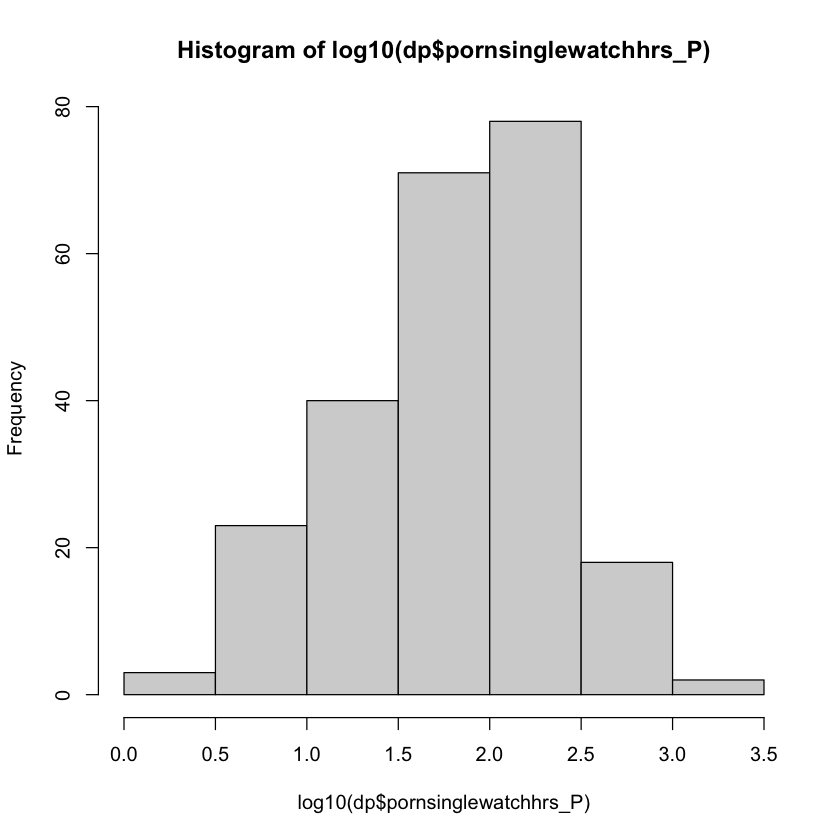

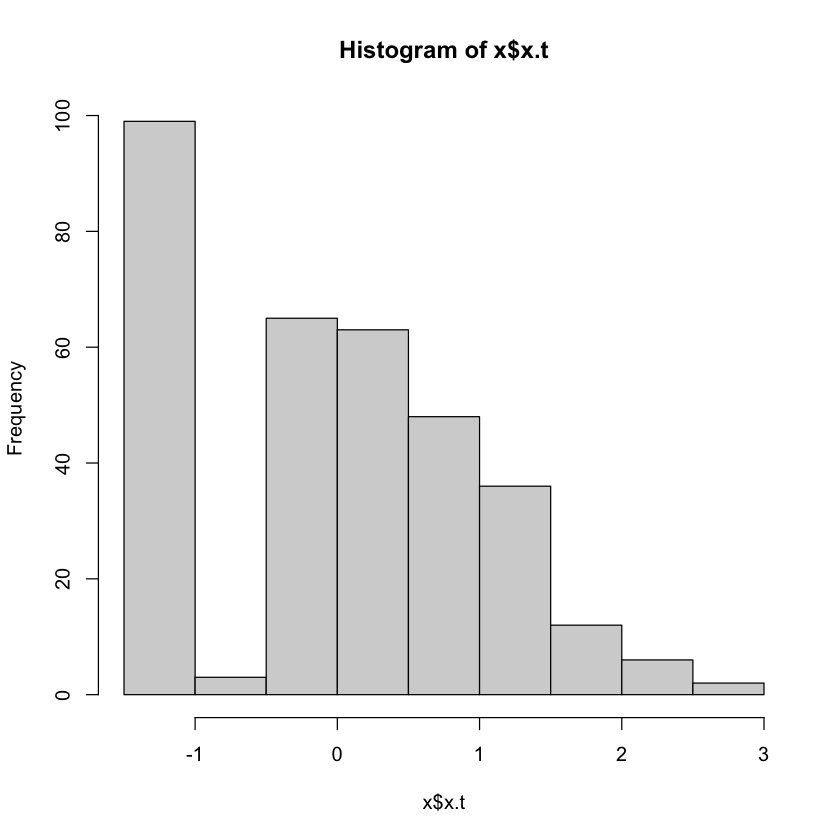

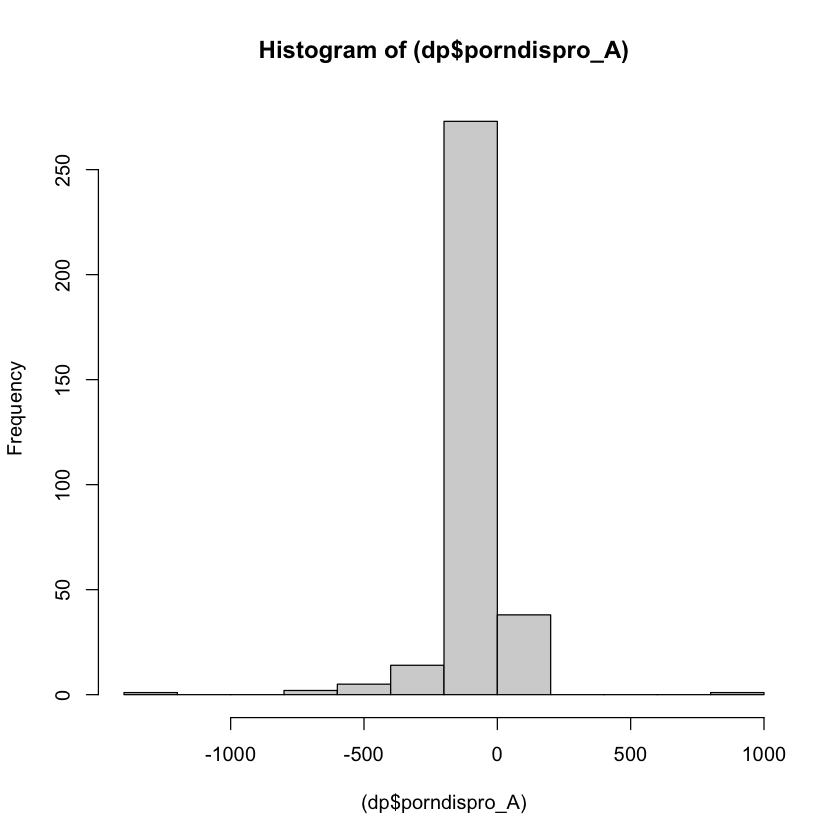

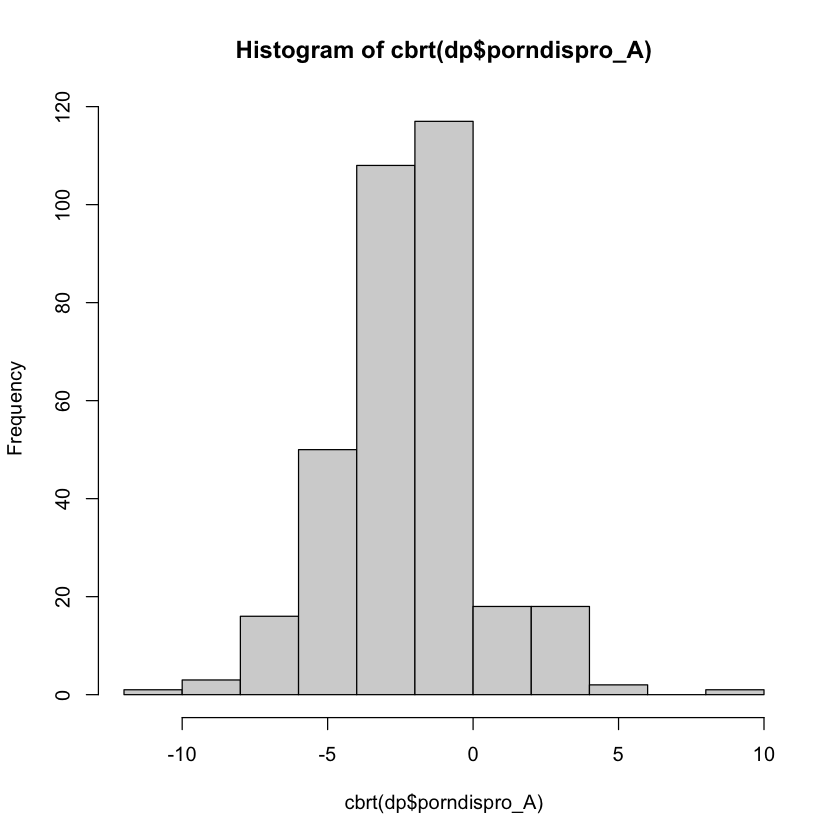

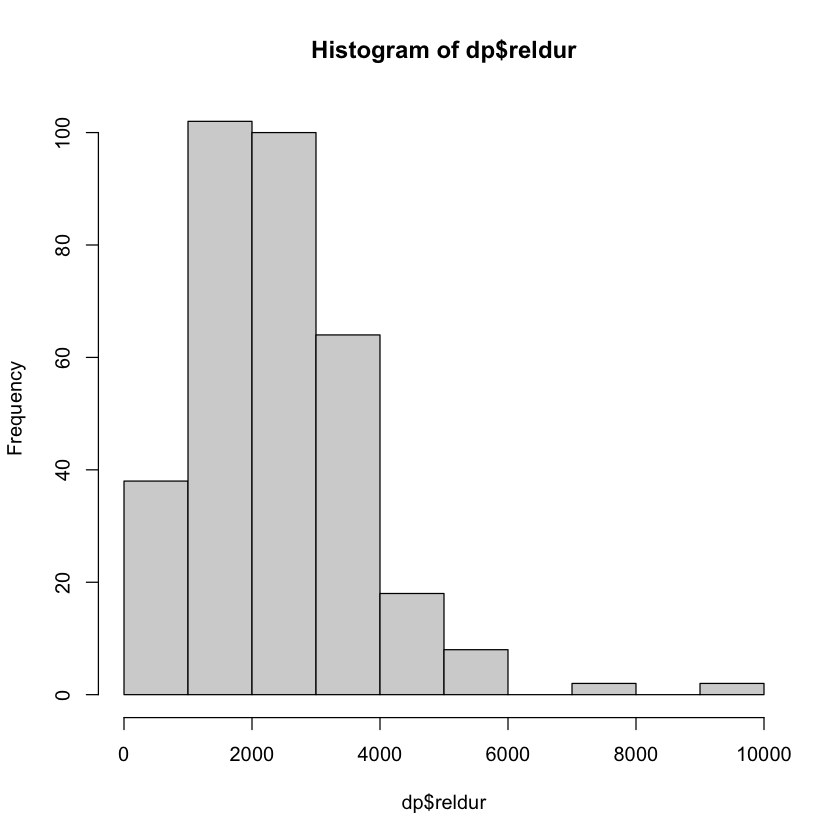

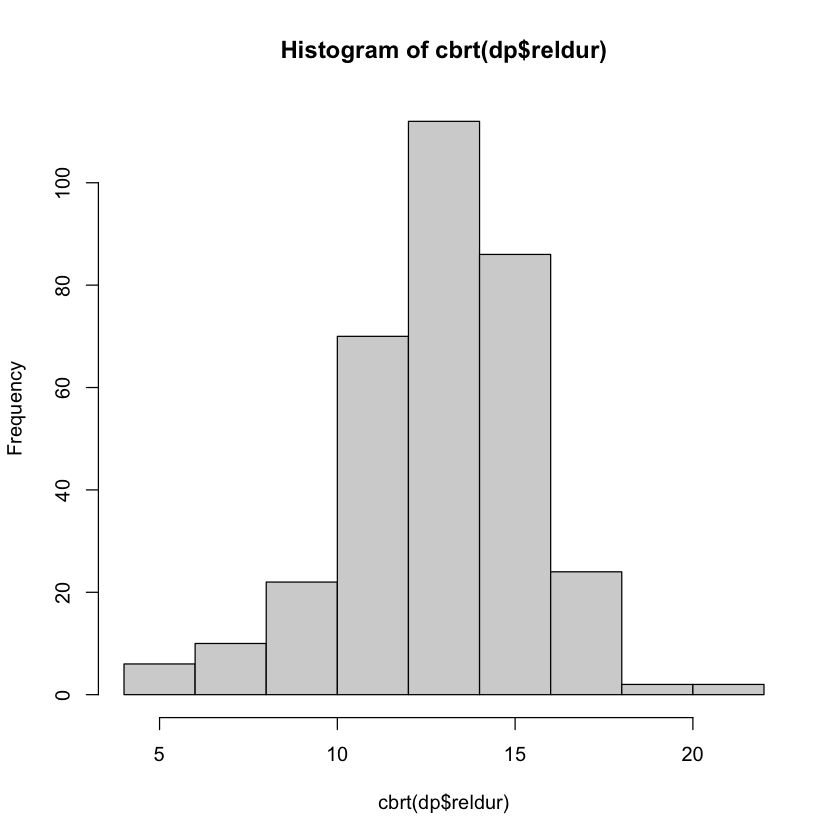

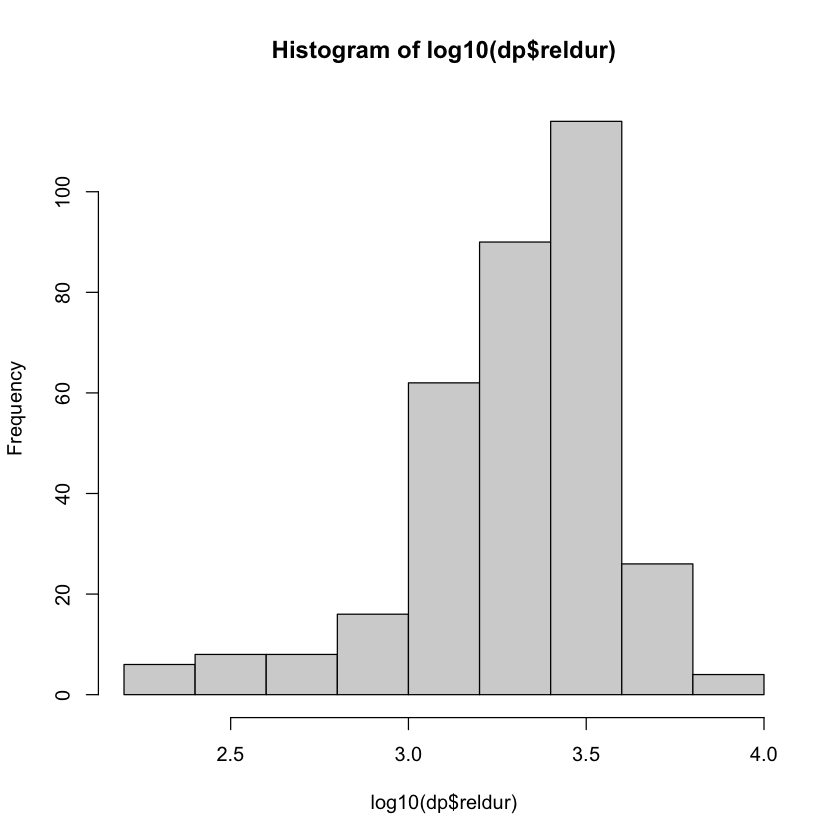

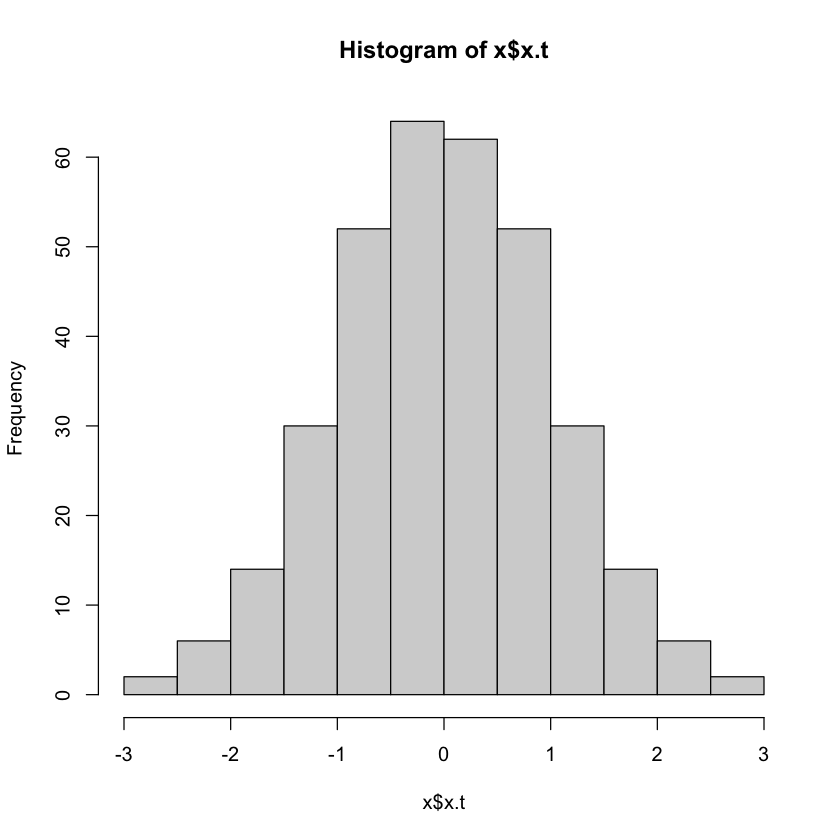

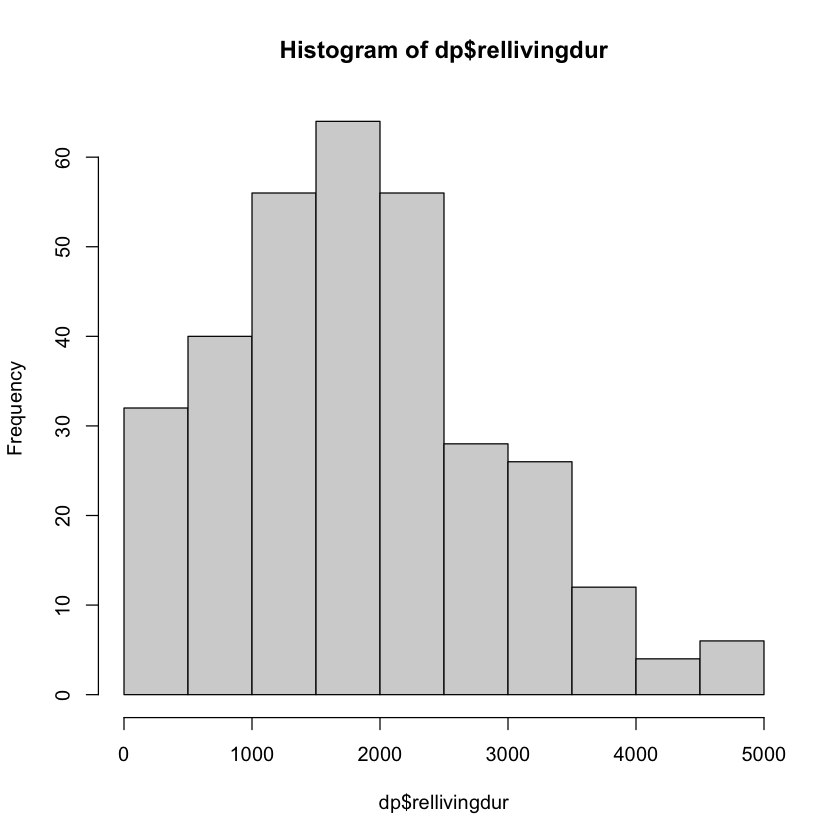

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: ‘lme4’


The following object is masked from ‘package:nlme’:

    lmList


Loading required package: parallel



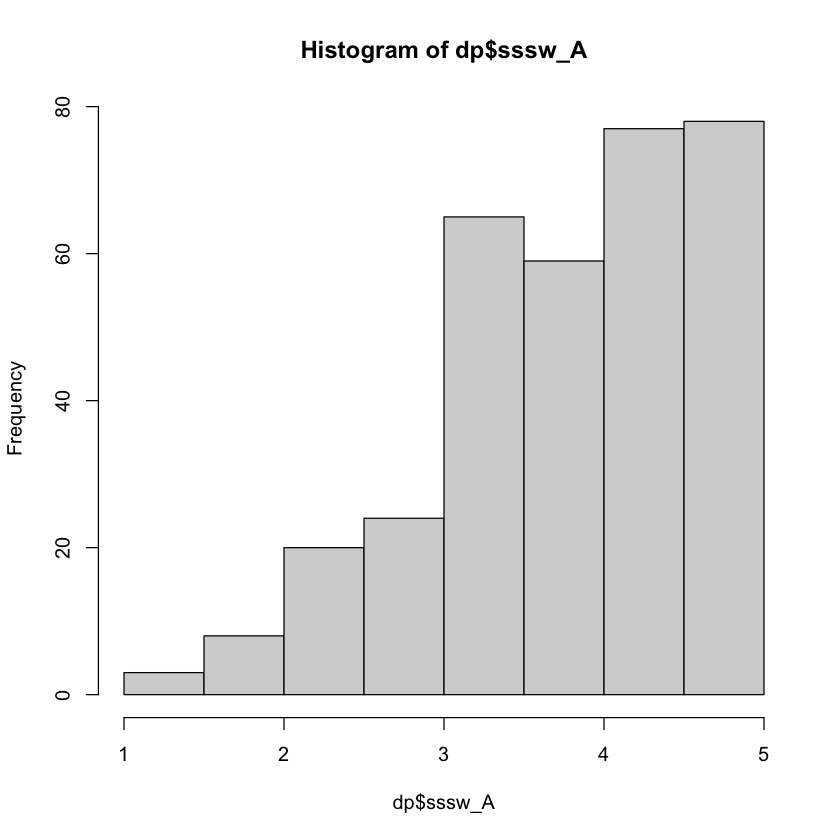

In [1]:
par(bg="white")
source("read_porno.R")
library("car")
library(tidyverse)
library(predictmeans)

In [10]:
dp$norm_pornsinglewatchhrs_A  = sqrt(dp$pornsinglewatchhrs_A)
dp$norm_pornsinglewatchhrs_P  = sqrt(dp$pornsinglewatchhrs_P)
dp$norm_pornwatchhrs_A  = sqrt(dp$pornwatchhrs_A)
dp$norm_pornwatchhrs_P  = sqrt(dp$pornwatchhrs_P)

##### Mediacja - krok 1 - x => y

In [22]:

mod1 = gls(norm_sssw_A ~ sex_A + sex_A:norm_pornsinglewatchhrs_A + sex_A:norm_pornsinglewatchhrs_P - 1,
          data = dp,
          correlation = corCompSymm(form = ~1|id),
          weights = varIdent(form= ~1|sex_A),
          na.action = na.omit)
summary(mod1)

Generalized least squares fit by REML
  Model: norm_sssw_A ~ sex_A + sex_A:norm_pornsinglewatchhrs_A + sex_A:norm_pornsinglewatchhrs_P -      1 
  Data: dp 
      AIC      BIC   logLik
  820.986 855.1231 -401.493

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7569322 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
 Female    Male 
1.00000 1.09556 

Coefficients:
                                           Value  Std.Error   t-value p-value
sex_AFemale                            0.2646166 0.11851894  2.232695  0.0262
sex_AMale                              0.3470399 0.12984465  2.672732  0.0079
sex_AFemale:norm_pornsinglewatchhrs_A -0.0135854 0.01316840 -1.031669  0.3030
sex_AMale:norm_pornsinglewatchhrs_A   -0.0445992 0.01192877 -3.738791  0.0002
sex_AFemale:norm_pornsinglewatchhrs_P -0.0251355 0.01088828 -2.308492  0.0216
sex_AMale:norm_pornsinglewatchhrs_P    0.01909

##### x => m

In [23]:

mod2 = gls(norm_pornwatchhrs_A ~ sex_A + sex_A:norm_pornsinglewatchhrs_A + sex_A:norm_pornsinglewatchhrs_P - 1,
          data = dp,
          correlation = corCompSymm(form = ~1|id),
          weights = varIdent(form= ~1|sex_A),
          na.action = na.omit)
summary(mod2)

Generalized least squares fit by REML
  Model: norm_pornwatchhrs_A ~ sex_A + sex_A:norm_pornsinglewatchhrs_A +      sex_A:norm_pornsinglewatchhrs_P - 1 
  Data: dp 
       AIC      BIC    logLik
  1754.266 1788.404 -868.1332

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.0910737 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.482033 

Coefficients:
                                           Value Std.Error   t-value p-value
sex_AFemale                            1.0400630 0.3424251  3.037345  0.0026
sex_AMale                             -0.1978647 0.5074854 -0.389892  0.6969
sex_AFemale:norm_pornsinglewatchhrs_A  0.2959788 0.0380462  7.779464  0.0000
sex_AMale:norm_pornsinglewatchhrs_A    0.5717101 0.0466224 12.262552  0.0000
sex_AFemale:norm_pornsinglewatchhrs_P  0.0596633 0.0314584  1.896575  0.0588
sex_AMale:norm_pornsinglewatchhrs_P 

#### x + m => y

In [24]:

mod3 = gls(norm_sssw_A ~ sex_A + sex_A:norm_pornsinglewatchhrs_A + sex_A:norm_pornsinglewatchhrs_P + sex_A:norm_pornwatchhrs_A + sex_A:norm_pornwatchhrs_P - 1,
          data = dp,
          correlation = corCompSymm(form = ~1|id),
          weights = varIdent(form= ~1|sex_A),
          na.action = na.omit)
summary(mod3)

Generalized least squares fit by REML
  Model: norm_sssw_A ~ sex_A + sex_A:norm_pornsinglewatchhrs_A + sex_A:norm_pornsinglewatchhrs_P +      sex_A:norm_pornwatchhrs_A + sex_A:norm_pornwatchhrs_P - 1 
  Data: dp 
       AIC      BIC    logLik
  840.5732 889.7228 -407.2866

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7597466 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.107854 

Coefficients:
                                           Value  Std.Error    t-value p-value
sex_AFemale                            0.3284325 0.11994274  2.7382443  0.0065
sex_AMale                              0.3583925 0.13287906  2.6971328  0.0074
sex_AFemale:norm_pornsinglewatchhrs_A  0.0092563 0.01539049  0.6014293  0.5480
sex_AMale:norm_pornsinglewatchhrs_A   -0.0229990 0.01644013 -1.3989539  0.1628
sex_AFemale:norm_pornsinglewatchhrs_P -0.0103800 0.0148

In [35]:
w = dp %>% filter(sex_A == "Female")
m = dp %>% filter(sex_A == "Male")

In [39]:
library(processr)

In [42]:
mod4 <- model4(iv = "norm_pornsinglewatchhrs_A", dv = "norm_sssw_A", med = "norm_pornwatchhrs_A", data = w, samples = 1000)

In [46]:
mod4m <- model4(iv = "norm_pornsinglewatchhrs_A", dv = "norm_sssw_A", med = "norm_pornwatchhrs_A", data = m, samples = 1000)

In [53]:
data.frame(mod4)

,label,est,se,z,pvalue,ci.lower,ci.upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,a,0.324690587,0.07630784,4.25500956,2.090401e-05,0.17354167,0.464386223
2,b,-0.075138208,0.02551722,-2.94460803,3.233640e-03,-0.11943244,-0.017979494
3,cp,-0.001284742,0.01528043,-0.08407757,9.329948e-01,-0.02955811,0.031812881
4,ind,-0.024396669,NA,NA,NA,-0.05104164,-0.006366759
5,c,-0.025681411,0.01211981,-2.11896126,3.409374e-02,-0.05178277,-0.003323914


In [49]:
data.frame(mod4m)

,label,est,se,z,pvalue,ci.lower,ci.upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,a,0.63412257,0.05964701,10.631256,0.0000000000,0.50129097,0.736829182
2,b,-0.02813270,0.01886302,-1.491421,0.1358509056,-0.06948187,0.005662444
3,cp,-0.02047841,0.01521562,-1.345881,0.1783410555,-0.05036260,0.010648758
4,ind,-0.01783958,NA,NA,NA,-0.04796785,0.002335622
5,c,-0.03831799,0.01077538,-3.556069,0.0003764456,-0.06077507,-0.018503400
